## Playground Notebook (Football Analytics Master's Thesis)

This notebook is meant to provide a drafting environment to explore tracking data from football matches and test different models and metrics to evaluate team and players performance. The main approach taken will be to adapt and explore the applicability of concepts traditionally used in complex systems physics to analyse tracking data. The final objective is to obtain new metrics, attack and defense strategy characterization and insights that can be applied in real training scenarios.

This notebook will provisionally be the main interface to interact, explain the methodology and obtain results from the scripts that will be imported to perform most of the underlying necessary functionality.

#### Required libraries imports

In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
%matplotlib notebook

In [2]:
sys.path.append('../')
import source.Metrica_Viz as mviz
import source.Metrica_IO as mio
import source.Metrica_Velocities as mvel
import source.Metrica_PitchControl as mpc
from source.Match_Analytics import Match


In [17]:
# set up initial path to data
DATA_PATH = '../data/MetricaSportsSampleData/data'
game_id = 2 # let's look at sample match 2
pitch_width = 106. # Pitch width in m
pitch_height = 69. # Pitch height in m

#read match data
tracking_home,tracking_away,events = mio.read_match_data(DATA_PATH,game_id)

# Convert positions from metrica units to meters (note change in Metrica's coordinate system since the last lesson)
tracking_home = mio.to_metric_coordinates(tracking_home, field_dimen=(pitch_width,pitch_height))
tracking_away = mio.to_metric_coordinates(tracking_away, field_dimen=(pitch_width,pitch_height))
events = mio.to_metric_coordinates(events, field_dimen=(pitch_width,pitch_height))

# reverse direction of play in the second half so that home team is always attacking from right->left
tracking_home,tracking_away,events = mio.to_single_playing_direction(tracking_home,tracking_away,events)

goalkeeper_home = mio.find_goalkeeper(tracking_home)
goalkeeper_away = mio.find_goalkeeper(tracking_away)

Reading team: home
Reading team: away


In [18]:
# Calculate player velocities
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True)
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True)
# **** NOTE *****
# if the lines above produce an error (happens for one version of numpy) change them to the lines below:
# ***************
#tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
#tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')

# Calculate player normals
tracking_home = mvel.player_norm_positions(tracking_home)
tracking_away = mvel.player_norm_positions(tracking_away)

<IPython.core.display.Javascript object>


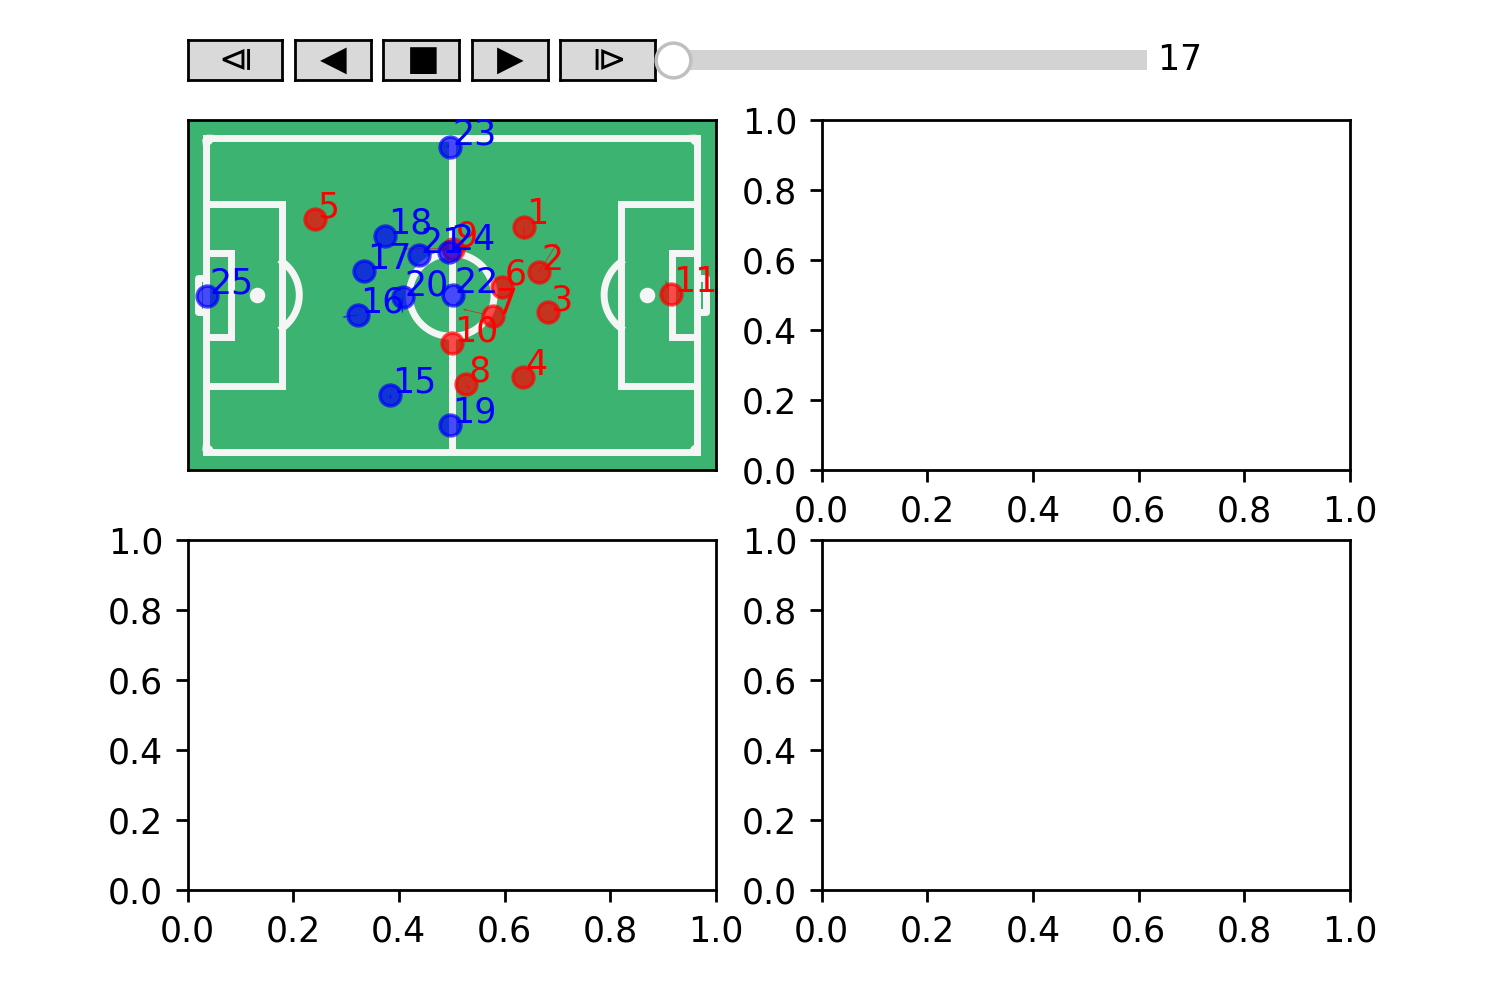

In [19]:
### using this class is as easy as using FuncAnimation:            

fig, ax = plt.subplots(2,2, figsize=(6,4))

def update(i):
    ax[0][0].clear()
    mviz.plot_pitch(field_color = 'green', figax = (fig, ax[0][0]), field_dimen=(pitch_width,pitch_height))
    mviz.plot_frame(tracking_home.loc[i],tracking_away.loc[i], annotate=True, 
                    include_player_velocities=True, figax = (fig, ax[0][0]),
                    field_dimen=(pitch_width,pitch_height))

ani = mviz.Player(fig, update, maxi=len(tracking_home)-1)

plt.show()

<IPython.core.display.Javascript object>


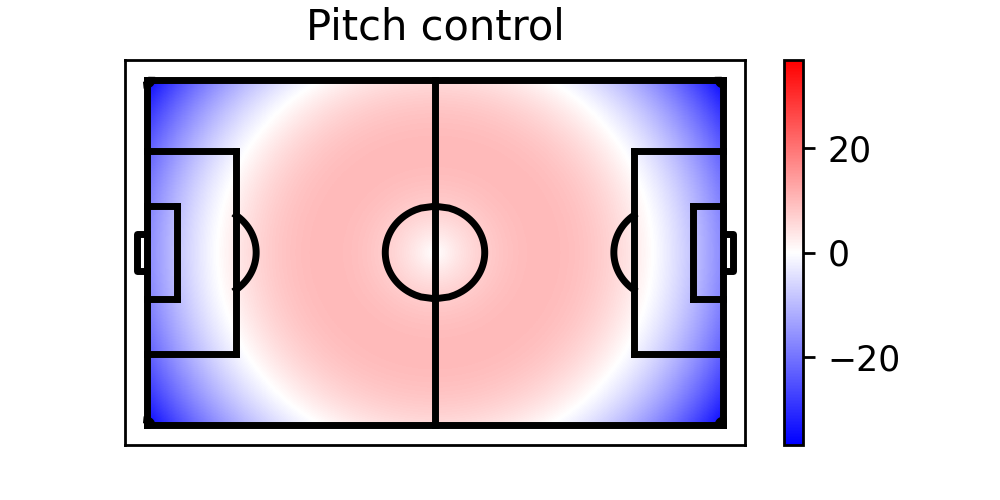

In [22]:
def calculate_pitch_control():
    x = np.arange(-pitch_width/2, pitch_width/2, 0.1)  # len = 11
    y = np.arange(-pitch_height/2, pitch_height/2, 0.1)  # len = 7
    xx, yy = np.meshgrid(x, y)

    z = np.sqrt(xx**2+yy**2)+(-xx**2-yy**2)/40
    
    return x, y, z



fig, ax = plt.subplots(figsize = (4,2))
mviz.plot_pitch(field_color = 'white', figax = (fig, ax))



team_colors = ["blue","white","red"]
nodes = [0.0,0.5,1]
cmap2 = colors.LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, team_colors)))

xx, yy, zz = calculate_pitch_control()
cmap = cm.coolwarm
pc = ax.pcolormesh(xx, yy, zz, norm=colors.CenteredNorm(), cmap=cmap2)
fig.colorbar(pc, ax=ax)
ax.set_title('Pitch control')

plt.show()

In [21]:
tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_5_normx,Home_5_normy,Home_6_normx,Home_6_normy,Home_7_normx,Home_7_normy,Home_8_normx,Home_8_normy,Home_9_normx,Home_9_normy
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28497,15.70072,14.76255,18.81712,4.96593,21.07492,-3.86814,...,-2.222723,1.446972,0.032082,0.137871,-0.075438,-0.203877,-0.401783,-1.545754,-0.556011,1.187439
2,1,0.08,46.9315,-0.28497,15.70072,14.76255,18.81712,4.96593,21.07492,-3.86814,...,-2.222723,1.446972,0.032082,0.137871,-0.075438,-0.203877,-0.401783,-1.545754,-0.556011,1.187439
3,1,0.12,46.9315,-0.28497,15.70072,14.76255,18.81712,4.96593,21.07492,-3.86814,...,-2.222723,1.446972,0.032082,0.137871,-0.075438,-0.203877,-0.401783,-1.545754,-0.556011,1.187439
4,1,0.16,46.9315,-0.28497,15.70072,14.76255,18.81712,4.96593,21.07492,-3.86814,...,-2.225106,1.446929,0.032520,0.137878,-0.074887,-0.203873,-0.400891,-1.545761,-0.554957,1.187454
5,1,0.20,46.9315,-0.28497,15.70072,14.76255,18.81712,4.96593,21.07492,-3.86814,...,-2.227454,1.446885,0.032952,0.137884,-0.074344,-0.203869,-0.400010,-1.545768,-0.553917,1.187469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,46.3379,-0.85767,12.19106,23.90436,29.08852,5.96505,24.22948,12.27579,...,-0.704186,1.378141,-0.556651,-0.693108,-0.319206,-0.684765,NaN,NaN,0.366121,0.186887
141153,2,5646.12,46.3379,-0.85767,12.19106,23.90436,29.08852,5.96505,24.22948,12.27579,...,-0.703738,1.378034,-0.560637,-0.691350,-0.318850,-0.683781,NaN,NaN,0.371679,0.183647
141154,2,5646.16,46.3379,-0.85767,12.19106,23.90436,29.08852,5.96505,24.22948,12.27579,...,-0.703666,1.377981,-0.562429,-0.687562,-0.318826,-0.682818,NaN,NaN,0.375398,0.178455


In [3]:
a = Match("Match1","metrica-sports",1)

In [4]:
a.process_all()

The match Match1 has been processed.


In [5]:
a.tracking_away

1